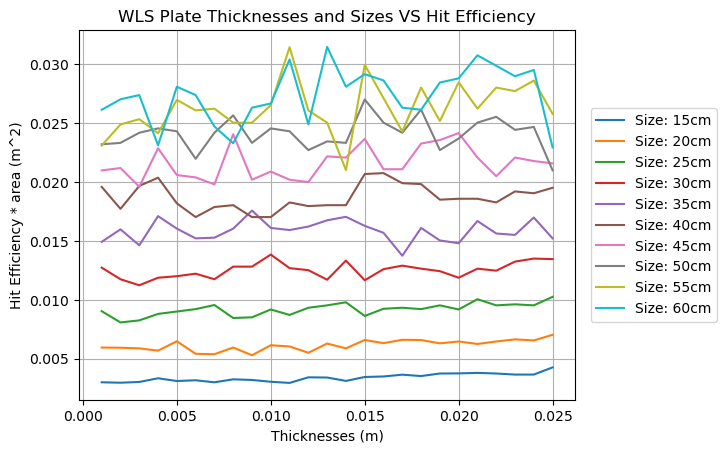

In [1]:
#%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import math


nruns = 1000

thicknesses = np.arange(1e-3,26e-3,1e-3) #mm
sizes = np.arange(15e-2,61e-2,5e-2) #cm

rx, ry, rz = 0.0762/2, 40e-3, 0.0762/2  # PMT radii
area_half_pmt = (math.pi * rx**2)/2 #circle
vol_half_pmt = (4 * math.pi * (((rx*ry)**1.6 + (rx*rz)**1.6 + (ry*rz)**1.6)/3)**(1/1.6))/2

det_times = []
all_times = []
dist = []




for s in sizes:

    hit_eff = []
    det_av_time = []
    area_half_wls = (s**2)/2
    area_total = area_half_wls - area_half_pmt
    #print(area_total)
    
    for t in thicknesses:

        vol_half_wls = (t * s**2)/2
        vol_total = vol_half_wls - vol_half_pmt
        #print(vol_total)

            
        path = 'outputs/'
        out_file = path + 'sim_output_' + str(int(t*1e+3)) + 'mm_' + str(int(s*1e+2)) + 'cm' + '.txt'
        out_data = np.genfromtxt(out_file, names=True, delimiter=';', dtype=None, encoding=None) #read data
        hits = np.where(out_data['Hit_coordinate_m'] != '[]')[0]
        det_times_ = out_data[hits]['Time_s']
        all_times_ = out_data['Time_s']
        det_times.append(det_times_)
        all_times.append(all_times_)
        det_av_time.append(np.mean(det_times_))
        hit_eff.append((len(hits)/nruns)* area_total)
        dist.append(out_data['Total_distance_m'])   

    #plt.plot(thicknesses,det_av_time, label = 'Size: ' + str(int(s*1e+2)) + 'cm')
    plt.plot(thicknesses,hit_eff, label = 'Size: ' + str(int(s*1e+2)) + 'cm')


plt.xlabel("Thicknesses (m)")
plt.ylabel("Hit Efficiency * area (m^2)")
plt.title("WLS Plate Thicknesses and Sizes VS Hit Efficiency")
# plt.ylabel("Time (s)")
# plt.title("WLS Plate Thicknesses and Sizes VS Average Detection Time")
plt.legend(loc='center right', bbox_to_anchor=(1.3, 0.5))
plt.grid()
plt.show()


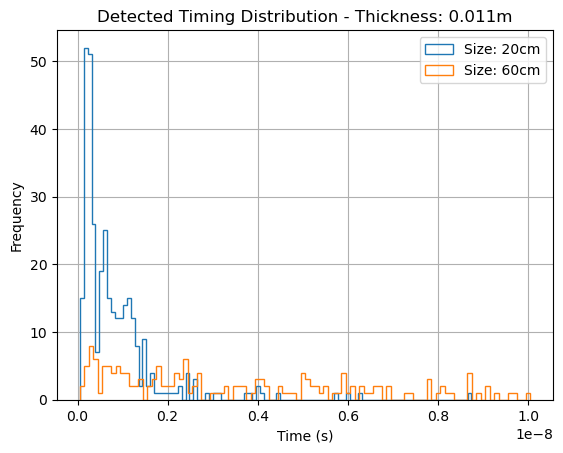

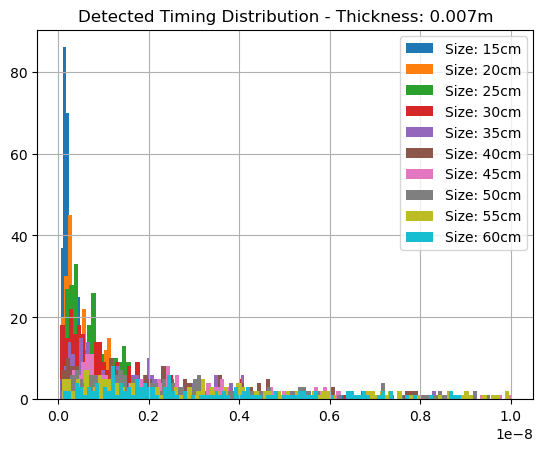

In [2]:
plt.hist(det_times[10 + (len(thicknesses)*1)], bins=100, label = "Size: " + str(int(sizes[1]*1e+2)) + "cm", histtype="step")
plt.hist(det_times[10 + (len(thicknesses)*9)], bins=100, label = "Size: " + str(int(sizes[9]*1e+2)) + "cm", histtype="step")
       
plt.title("Detected Timing Distribution - Thickness: " + str(thicknesses[10]) + "m")
plt.grid()
plt.ylabel("Frequency")
plt.xlabel("Time (s)")
plt.legend(loc = "upper right")
plt.show()


for s in range(0,len(sizes)):
    plt.hist(det_times[6 + (len(thicknesses)*s)], bins=100, label = "Size: " + str(int(sizes[s]*1e+2)) + "cm")

plt.title("Detected Timing Distribution - Thickness: " + str(thicknesses[6]) + "m")
plt.legend(loc="upper right")
plt.grid()
plt.show()

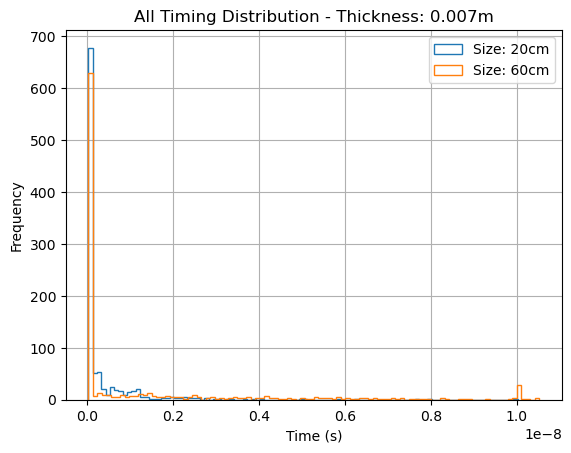

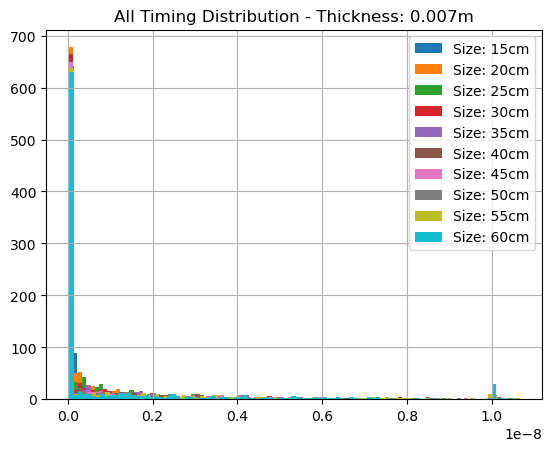

In [3]:
plt.hist(all_times[6 + (len(thicknesses)*1)], bins=100, label = "Size: " + str(int(sizes[1]*1e+2)) + "cm", histtype="step")
plt.hist(all_times[6 + (len(thicknesses)*9)], bins=100, label = "Size: " + str(int(sizes[9]*1e+2)) + "cm", histtype="step")
       
plt.title("All Timing Distribution - Thickness: " + str(thicknesses[6]) + "m")
plt.grid()
plt.ylabel("Frequency")
plt.xlabel("Time (s)")
plt.legend(loc = "upper right")
plt.show()


for s in range(0,len(sizes)):
    plt.hist(all_times[6 + (len(thicknesses)*s)], bins=100, label = "Size: " + str(int(sizes[s]*1e+2)) + "cm")

plt.title("All Timing Distribution - Thickness: " + str(thicknesses[6]) + "m")
plt.legend(loc="upper right")
plt.grid()
plt.show()

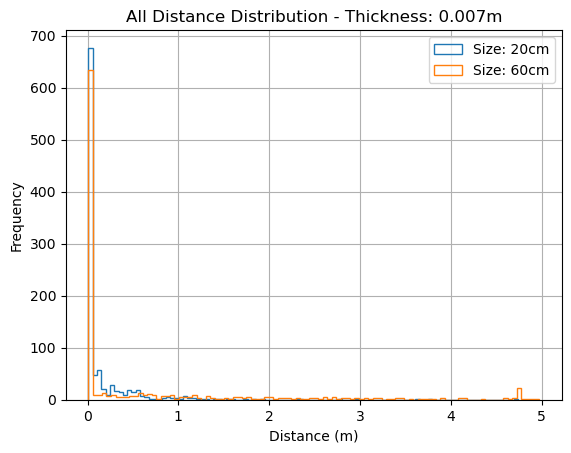

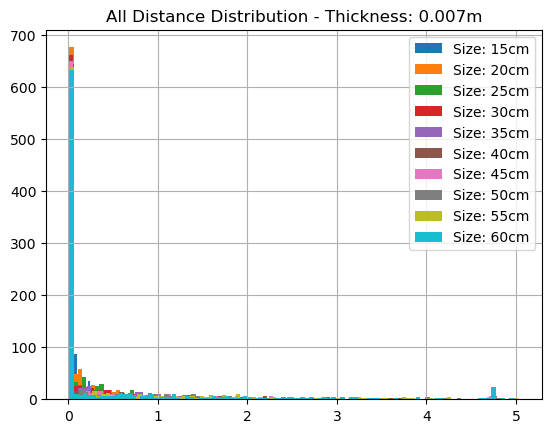

In [4]:
plt.hist(dist[6 + (len(thicknesses)*1)], bins=100, label = "Size: " + str(int(sizes[1]*1e+2)) + "cm", histtype="step")
plt.hist(dist[6 + (len(thicknesses)*9)], bins=100, label = "Size: " + str(int(sizes[9]*1e+2)) + "cm", histtype="step")
       
plt.title("All Distance Distribution - Thickness: " + str(thicknesses[6]) + "m")
plt.grid()
plt.ylabel("Frequency")
plt.xlabel("Distance (m)")
plt.legend(loc = "upper right")
plt.show()


for s in range(0,len(sizes)):
    plt.hist(dist[6 + (len(thicknesses)*s)], bins=100, label = "Size: " + str(int(sizes[s]*1e+2)) + "cm")

plt.title("All Distance Distribution - Thickness: " + str(thicknesses[6]) + "m")
plt.legend(loc="upper right")
plt.grid()
plt.show()